In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

# Data Collection and Preprocessing

In [ ]:
dataset_df = pd.read_csv('train.csv')

In [ ]:
dataset_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
dataset_df = dataset_df.dropna()

In [ ]:
dataset_df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
dataset_df.shape

(480, 13)

In [ ]:
dataset_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
dataset_df= dataset_df.drop(columns='Loan_ID',axis=1)

In [ ]:
dataset_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

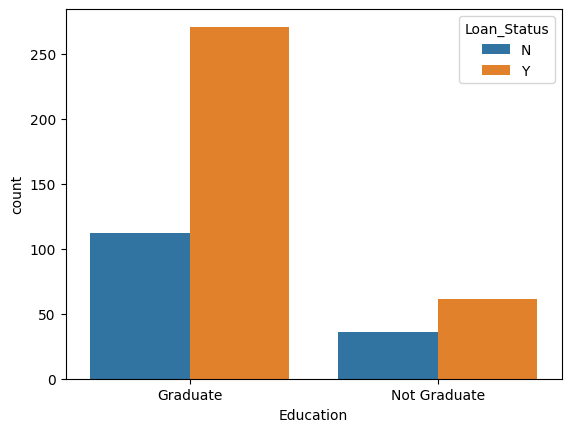

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=dataset_df)

In [ ]:
dataset_df.replace({'Loan_Status': {'N':0, 'Y':1}},inplace=True)

In [ ]:
dataset_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
dataset_df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [ ]:
dataset_df.replace({'Gender' : {'Male' : 0, 'Female' : 1}, 'Married' : {'No': 0 , 'Yes' : 1}, 'Education' : {'Not Graduate' : 0, 'Graduate' : 1}, 'Self_Employed': {'No' : 0, 'Yes':1}, 'Property_Area': {'Rural': 0, 'Semiurban' : 1, 'Urban' : 2}} , inplace=True)

In [ ]:
dataset_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
dataset_df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
dataset_df.replace(to_replace='3+', value=4, inplace=True)

In [ ]:
dataset_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
dataset_df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
X = dataset_df.drop(columns='Loan_Status',axis=1)
Y = dataset_df['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [ ]:
Y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,0
10,1


In [ ]:
X.shape, Y.shape

((480, 11), (480,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# Model Building

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

# Testing

In [ ]:
training_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_prediction, Y_train)
print(training_data_accuracy)

0.7890625


In [ ]:
test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_prediction, Y_test)
print(test_data_accuracy)

0.8229166666666666


In [ ]:
dataset_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# Custom Input

In [ ]:
input = (0,1	,1	,1,	0,	4583,	1508.0,	128.0,	360.0,	1.0	,0)
input = np.asarray(input)
input_reshaped = input.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
